# Pinhole/Linear Camera Model

<img src="imgs/pinhole_camera_model.png" style="background : white">

By similarity of triangles we can make the perspective projection between the <u>Camera reference</u> system and the <u>Image Plane</u>:

$$
\frac{x}{X_C}=\frac{f}{Z_c} \rightarrow x = \frac{X_cf}{Z_c} \\
\frac{y}{Y_C}=\frac{f}{Z_c} \rightarrow y = \frac{Y_cf}{Z_c} 
$$

Then, from <u>Image Plane</u> in mm to <u>Sensor Plane</u> in pixels

$$
u = f_x\frac{X_c}{Z_c} + c_x\\
v = f_y\frac{Y_c}{Z_c} + c_y\\
$$

Which in homegeneus matrix is given by:

$$
\begin{bmatrix}
    u \\\
    v \\\
    1
\end{bmatrix} \equiv Z_c
\begin{bmatrix}
    u \\\
    v \\\
    1
\end{bmatrix} =
\begin{bmatrix}
    f_xX_c + c_xZ_c \\\
    f_yY_c + c_yZ_c \\\
    1
\end{bmatrix} =
\underbrace{
    \begin{bmatrix}
        f_x & 0 & c_x & 0 \\\
        0 & f_y & c_y & 0 \\\
        0 & 0 & 1 & 0
    \end{bmatrix}
}_{Intrinsic \ parameters \ [K_{3\times 3}|0]}
\begin{bmatrix}
    X_c \\\
    Y_c \\\
    Z_c \\\
    1
\end{bmatrix}   \ \ \ (1)
$$

The transformation between the <u>World reference</u> system and the <u>Camera reference</u> is given by:

$$
\begin{bmatrix}
X_c \\\
Y_c \\\
Z_c
\end{bmatrix} = R_{3\times 3}
\begin{bmatrix}
X_w \\\
Y_w \\\
Z_w
\end{bmatrix} +
\begin{bmatrix}
t_x \\\
t_y \\\
t_z
\end{bmatrix}
$$

Which in homegeneus matrix is given by:

$$
\begin{bmatrix}
X_c \\
Y_c \\
Z_c \\
1
\end{bmatrix} = 
\underbrace{
    \begin{bmatrix}
        R_{3 \times 3} & t_{3\times 1} \\
        0_{1\times 3} & 1 
    \end{bmatrix}
}_{Extrinsinc \ parameters \ T_{4\times 4}}
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1
\end{bmatrix}   \ \ \ (2)
$$

The coordinate of a point in the world P on the Sensor plane can be achieved by combining equations (1) and (2):

$$
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}=
\underbrace{
        \underbrace{
            \begin{bmatrix}
                f_x & 0 & c_x & 0 \\
                0 & f_y & c_y & 0 \\
                0 & 0 & 1 & 0
            \end{bmatrix}
        }_{Intrinsinc \ parameters \ [K_{3\times 3}|0]}
        \underbrace{
            \begin{bmatrix}
                R_{3 \times 3} & t_{3\times 1} \\
                0_{1 \times 3} & 1 
            \end{bmatrix}
        }_{Extrinsinc \ parameters \ T_{4\times 4}}
}_{P_{3\times 4}}
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1
\end{bmatrix}  \ \ \ (3)
$$

The intrinsic parameters $(f_x,f_y,c_x,c_y)$ can be found after the calibration process and are assumed to be known.

### Calibration process

The calibration consist in take pictures of an well known pattern, easy find a set of $[u^{(i)} v^{(i)} X_w^{(i)} Y_w^{(i)} Z_w^{(i)}], i=1,2,...,n$ homologue points between these pictures and solve the equation (3) for $P$. Then, factorize $P$ into $K$ and $T$. Then, extract $f_x$, $f_y$, $c_x$ and $c_y$ from $K$ and factorize again $T$ into $R$ ant $t$.

In practice, we also doesn't have $[X_w^{(i)} Y_w^{(i)} Z_w^{(i)}]$. The trick consist in explore the planar constrait and equal spacement between detected edges of our pattern, (corners in case of checkerboard).

#### Solving for P

$$
Z_w\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix}
\begin{bmatrix}
    X_w \\
    Y_w \\
    Z_w \\
    1
\end{bmatrix} =
\begin{bmatrix}
    p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14} \\
    p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24} \\
    p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}
\end{bmatrix} \\
$$
$$
u = \frac{p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14}}{p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}} \\

v = \frac{p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24}}{p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}} \\
$$
$$
p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14} - up_{31}X_w - u p_{32}Y_w - u p_{33}Z_w - u p_{34} = 0 \\

p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24} - vp_{31}X_w - v p_{32}Y_w - v p_{33}Z_w - v p_{34} = 0
$$

Making this as a vector multiplication we have:

$$
\begin{bmatrix}
X_w & Y_w & Z_w & 1 & 0   & 0   & 0   & 0 & -uX_w & -uY_w & -uZ_w & -u \\
0   &  0  & 0   & 0 & X_w & Y_w & Z_w & 1 & -vX_w & -vY_w & -vZ_w & -v 
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0
$$

And for our found set we have:

$$

\begin{bmatrix}
X_w^{(1)} & Y_w^{(1)} & Z_w^{(1)} & 1 & 0   & 0   & 0   & 0 & -u^{(1)}X_w^{(1)} & -u^{(1)}Y_w^{(1)} & -u^{(1)}Z_w^{(1)} & -u^{(1)} \\
0   &  0  & 0   & 0 & X_w^{(1)} & Y_w^{(1)} & Z_w^{(1)} & 1 & -v^{(1)}X_w^{(1)} & -v^{(1)}Y_w^{(1)} & -v^{(1)}Z_w^{(1)} & -v^{(1)} \\
\vdots \\
X_w^{(n)} & Y_w^{(n)} & Z_w^{(n)} & 1 & 0   & 0   & 0   & 0 & -u^{(n)}X_w^{(n)} & -u^{(n)}Y_w^{(n)} & -u^{(n)}Z_w^{(n)} & -u^{(n)} \\
0   &  0  & 0   & 0 & X_w^{(n)} & Y_w^{(n)} & Z_w^{(n)} & 1 & -v^{(n)}X_w^{(n)} & -v^{(n)}Y_w^{(n)} & -v^{(n)}Z_w^{(n)} & -v^{(n)} \\
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0 
$$

$$
\begin{bmatrix}A\end{bmatrix}_{2n \ \times \ 12}\ \begin{bmatrix}p\end{bmatrix}_{12 \ \times\ 1}=0
$$

Which is solveable trough constrained least squares parameter estimation method. The scale of $p$ is set and the problem is transformed into <u>[A][p] tending to [0]</u> such that <u>||p||=1</u>:

$$
min (||Ap||^2) \ subject \ to \ ||p||=1
$$

$$
min (p^TA^TAp) \ subject \ to \ p^Tp=1
$$

We can define a convenient loss function we want to minimize:

$$
min = p^TA^TAp - \lambda(p^Tp -1)
$$

Taking the derivative with respect to $p$, we have:

$$
0 = 2A^TAp - 2\lambda p
$$

That is equivalent to solving the eigenvalue problem:

$$
A^TAp = \lambda p
$$

$p$ is the eigenvector corresponding to smallest eigenvalue of $A^TA$.

#### Factorizing P

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x & 0 \\
    0 & f_y & c_y & 0 \\
    0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
    R_{3 \times 3} & t_{3\times 1} \\
    0_{1 \times 3} & 1 
\end{bmatrix}
$$

The first $3 \times 3$ block of $P$ is:

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    R\\
\end{bmatrix} = KR
$$

Where $K$ (the camera matrix) happen to be an upper triangular matrix and $R$ is a rotation matrix, thereby, orthonormal. With this, we can use *QR factorization* to compute $K$ and $R$.

The last $3 \times 1$ block of $P$ is:

$$
\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    t_x \\
    t_y \\
    t_z
\end{bmatrix} = Kt \rightarrow t = K^{-1}\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix}
$$

### Code of internal calibration - The short way using OpenCV implementation

In [2]:
# Imports 
import os
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Open Data
folder = "./calib_imgs/calib_photos_Pi_NOIR_2.1/" 
image_names = [f"{folder}{f}" for f in os.listdir(folder) if ".jpg" in f]
images = [cv2.imread(f) for f in image_names]

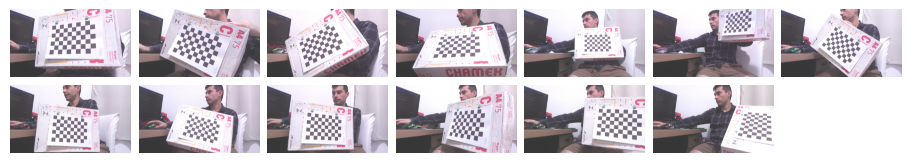

In [3]:
# Functions
def print_table(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))

def plotar(imgs):
    f, ax = plt.subplots(2,7, figsize=(9,6), layout="compressed")
    for i in range(0,7):
        ax[0,i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
        try:
            ax[1,i].imshow(cv2.cvtColor(imgs[i+7], cv2.COLOR_BGR2RGB))
        except IndexError:
            pass
        ax[0,i].axis('off')
        ax[1,i].axis('off')
    plt.show()

# Display what we got
plotar(images)

In [4]:
# Define the dimensions of checkerboard 
CHECKERBOARD = (6, 9) 

# stop the iteration when specified 
# accuracy, epsilon, is reached or 
# specified number of iterations are completed. 
criteria = (cv2.TERM_CRITERIA_EPS +
			cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) 

# Vector for 3D points 
threedpoints = [] 

# Vector for 2D points 
twodpoints = [] 

# 3D points real world (faked) coordinates 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objectp3d = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), 
					  np.float32) 
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 
							   0:CHECKERBOARD[1]].T.reshape(-1, 2) 

print("Openning checkerbooard photos taken...")
for i in tqdm(range(len(images))): 
	grayColor = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY) 

	# Find the chess board corners 
	# If desired number of corners are 
	# found in the image then ret = true 
	ret, corners = cv2.findChessboardCorners( 
					grayColor, CHECKERBOARD, 
					cv2.CALIB_CB_ADAPTIVE_THRESH 
					+ cv2.CALIB_CB_FAST_CHECK +
					cv2.CALIB_CB_NORMALIZE_IMAGE) 

	# If desired number of corners can be detected then, 
	# refine the pixel coordinates and display 
	# them on the images of checker board 
	if ret == True: 
		threedpoints.append(objectp3d) 

		# Refining pixel coordinates 
		# for given 2d points. 
		corners2 = cv2.cornerSubPix( 
			grayColor, corners, (11, 11), (-1, -1), criteria) 

		twodpoints.append(corners2) 

		# Draw and display the corners 
		images[i] = cv2.drawChessboardCorners(images[i], 
											CHECKERBOARD, 
											corners2, ret)
		
	# plt.imshow( cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) ) 
	# plt.axis('off')
	# plt.show()

h, w = images[-1].shape[:2] 

# Perform camera calibration by 
# passing the value of above found out 3D points (threedpoints) 
# and its corresponding pixel coordinates of the 
# detected corners (twodpoints) 
print("Calibrating...") 
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera( 
	threedpoints, twodpoints, grayColor.shape[::-1], None, None) 

# Displaying required output 
print(" Camera matrix:") 
print_table(matrix)

print("\n Distortion coefficient:") 
print_table(distortion) 

print("\n Rotation Vectors shape:") 
print(np.array(r_vecs).shape) 

print("\n Translation Vectors shape:") 
print(np.array(t_vecs).shape) 

# Undistortion to refine K
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))
print("\n New Camera matrix:") 
print_table(newcameramtx)

# print("\n ROI:") 
# print(roi)

Openning checkerbooard photos taken...


100%|██████████| 13/13 [00:01<00:00, 12.43it/s]


Calibrating...
 Camera matrix:
1588.6948501696875	0.0               	897.0325784516132 
0.0               	1582.8699339443701	429.32796555506354
0.0               	0.0               	1.0               

 Distortion coefficient:
0.125628630582604	0.014164833202216974	-0.02470388238220341	-0.014853374038435577	-0.2937268367790947

 Rotation Vectors shape:
(13, 3, 1)

 Translation Vectors shape:
(13, 3, 1)

 New Camera matrix:
1573.347882015668	0.0               	853.7336744732708 
0.0              	1527.6887917071065	403.28946590584775
0.0              	0.0               	1.0               


In [5]:
## Check Results
# undistort
dst = cv2.undistort(images[-1], matrix, distortion, None, newcameramtx)
 
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite(f'{image_names[-1].split(".jpg")[0]}_calibresult.png', dst)

# Re-projection Error, close to 0 is better.
mean_error = 0
for i in range(len(threedpoints)):
    imgpoints2, _ = cv2.projectPoints(threedpoints[i], r_vecs[i], t_vecs[i], newcameramtx, distortion)
    error = cv2.norm(twodpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
 
print( "total error: {}".format(mean_error/len(threedpoints)) )

total error: 7.5142980209500605


We can see that Rotation (r_vectors) and translation (r_vectors) are not $R$ and $t$ defined above. 

[calibrateCamera()](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html): Output vector of rotation vectors (Rodrigues) estimated for each pattern view. That is, each i-th rotation vector together with the corresponding i-th translation vector brings the calibration pattern from the object coordinate space (in which object points are specified) to the camera coordinate space. In more technical terms, the tuple of the i-th rotation and translation vector performs a change of basis from object coordinate space to camera coordinate space. Due to its duality, this tuple is equivalent to the position of the calibration pattern with respect to the camera coordinate space.

In [12]:
# https://docs.opencv.org/4.x/d7/d53/tutorial_py_pose.html
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    print(tuple(imgpts[0].ravel()))
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img
# cv.line(img,(0,0),(511,511),(255,0,0),5)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

print("Openning checkerbooard photos taken...")
for i in tqdm(range(len(images))): 
    img = images[i]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)
 
    if ret == True:
        # corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
 
        # Find the rotation and translation vectors.
        ret,rvecs, tvecs = cv2.solvePnP(objectp3d, corners, newcameramtx, distortion)
 
        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, newcameramtx, distortion)
        img = draw(img,corners2,imgpts)
        cv2.imshow('img',img)
        k = cv2.waitKey(0) & 0xFF 
    # if k == ord('s'):
    #     cv2.imwrite(image_names[i].split(".jpg")[0]+'.png', img)
cv2.destroyAllWindows()

Openning checkerbooard photos taken...


  0%|          | 0/13 [00:00<?, ?it/s]

(720.9963, 451.06323)


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
